### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

 **Independent variable:** Word Condition (Congruent or Incongruent).                          **Dependent variable:** Response Time (seconds)

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

#### H0 - Null Hypothesis: ( μi - μc = 0 ) 
There is no significant difference in the population average response times in viewing the congruent words vs viewing the incongruent words.         
#### H1 - Alternative Hypothesis: ( μi - μc ≠ 0 ) 
There is a significant difference in the population average response times in viewing the congruent words vs viewing the incongruent words.

I'm going to use **Paired two-sample t-tests** because typically it consists of a sample of matched pairs of similar units, or one group of units that has been tested twice.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Read data
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


In [2]:
c = df['Congruent'];i = df['Incongruent']
#mean time for congurent and for incongurent/ measures of central tendency
c_mean =c.mean()
i_mean = i.mean()
c_mean,i_mean

(14.051124999999999, 22.015916666666666)

In [37]:
#mean difference
mean_diff = i_mean-c_mean
mean_diff

7.9647916666666667

In [4]:
#standart deviation/ measure of variability
c_std = c.std()
i_std = i.std()
c_std,i_std

(3.5593579576451955, 4.7970571224691376)

In [5]:
#difference in standart deviations
i_std-c_std

1.2376991648239422

In [36]:
#standard deviation of the difference
df['Difference'] = df['Congruent'] - df['Incongruent']
std_diff = df['Difference'].std(axis=0)
std_diff

4.8648269103590556

Descriptive statistics for our data:

/ measures of central tendency:

Mean responce time for congurent words is 14.05 sec and for incongurent words is 22.02 sec. Mean difference is 7.96

/ measures of variability:

Standart deviation for congurent words is 3.56 and for incongurent words is 4.80.
Difference in standart deviations is 1.24

Standard deviation of the difference is 4.86.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,1,'Distribution of responce time for Congurent words')

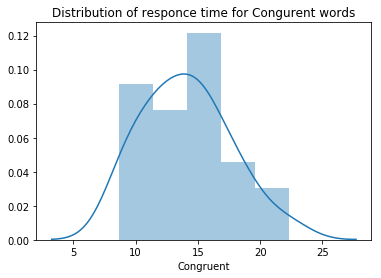

In [39]:
# Build the visualizations 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from scipy.stats import t
import math

congurent = sb.distplot(df['Congruent'])
congurent.set_title('Distribution of responce time for Congurent words')

Text(0.5,1,'Distribution of responce time for Incongurent words')

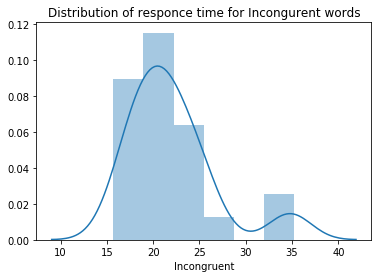

In [27]:
incongurent = sb.distplot(df['Incongruent'])
incongurent.set_title('Distribution of responce time for Incongurent words')

Text(0,0.5,'Completion Time (seconds)')

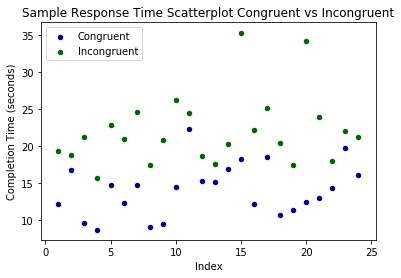

In [28]:
df['index'] = df.index+1
ax = df.plot.scatter(x='index', y='Congruent', color='DarkBlue', label='Congruent');
df.plot.scatter(x='index', y='Incongruent', color='DarkGreen', label='Incongruent', ax=ax);
ax.set_title('Sample Response Time Scatterplot Congruent vs Incongruent')
ax.set_xlabel('Index')
ax.set_ylabel('Completion Time (seconds)')


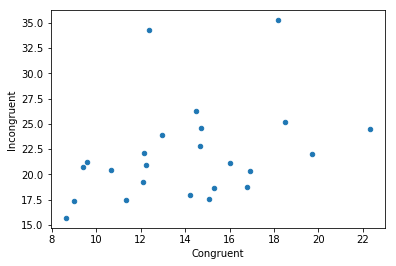

In [29]:
df.plot.scatter(x='Congruent', y='Incongruent');

For congurent words responce time distribution looks as normal distribution. For incogurent words distribution also looks like normal but has outlier data that skewed it right. Mean is pretty close to the peak in both distributions which confirms a normal distribution. We can see that time for incogurent data is larger than for incogurent. Scatter plots shows some degree of correlation between two data sets. The congruent words sample has a lower average completion time compared to the incongruent words scatterplot.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [44]:
# Perform the statistical test here
# Sample size 
len(df)

24

In [43]:
#t-critical value for a 95% confidence level and degree of freedom = 23 (number of data points in sample -1)
t.ppf(.95, 23)

1.7138715277470473

In [40]:
#t-statistic
mean_diff/(std_diff / math.sqrt(24))

8.020706944109957

Our t-statistic 8.02 is greater than our critical value 1.71, so we can reject the null hypothesis. There is significant difference in the population average response times in viewing the congruent words vs viewing the incongruent words. Which is pretty obvious from my own experiment.

Resources:
1. http://luizschiller.com/stroop-effect/
2. https://en.wikipedia.org/wiki/Student%27s_t-test
3. https://seaborn.pydata.org/generated/seaborn.distplot.html
4. https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-scatter
